In [1]:
# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import graphviz

from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

matplotlib.rc("font", family="Malgun Gothic")

# 랜덤 포레스트_분류

유방암 결과를 분류하는 랜덤 포레스트 모델을 만들고   
predict method를 이용하여 목표변수 범주를 예측하라.  
그리고 모델의 정확도와 confusion matrix를 구하라.
- 데이터 : 유방암.CSV(변수: 31개, 자료 수: 320개)
- 목표변수(diagnosis : 양성(108개), 음성(benign, 212개)

|변수|변수 설명|변수 역할|변수 형태|
|---|---|---|---|
|diagnosis|진단결과(음성, 양성)|목표변수|이산형|
|mean radius|(세포)평균 반경|설명변수|연속형|
|mean texture|(세포)평균 질감|설명변수|연속형|
|mean perimeter|(세포)평균 둘레|설명변수|연속형|
|mean area|(세포)평균 면적|설명변수|연속형|
|mean smoothness|(세포)평균 매끄러움|설명변수|연속형|
|mean compactness|(세포)평균 조그만 정도|설명변수|연속형|
|mean concavity|(세포)평균 오목함|설명변수|연속형|
|mean concave points|(세포)평균 오목한 점의 수|설명변수|연속형|
|mean symmetry|(세포)평균 대칭|설명변수|연속형|
|mean fractal dimension|(세포)평균 프랙탈 차원|설명변수|연속형|
|radius error|(세포)반경의 표준오차|설명변수|연속형|
|texture error|(세포)질감의 표준오차|설명변수|연속형|
|perimeter error|(세포)둘레의 표준오차|설명변수|연속형|
|area error|(세포)면적의 표준오차|설명변수|연속형|
|smoothness error|(세포)매끄러움의 표준오차|설명변수|연속형|
|compactness error|(세포)조그만 정도의 표준오차|설명변수|연속형|
|concavity error|(세포)오목함의 표준오차|설명변수|연속형|
|concave points error|(세포)오목한 점의 수의 표준오차|설명변수|연속형|
|symmetry error|(세포)대칭의 표준오차|설명변수|연속형|
|fractal dimension error|(세포)프랙탈 차원의 표준오차|설명변수|연속형|
|worst radius|(세포)최대 반경|설명변수|연속형|
|worst texture|(세포)최대 질감|설명변수|연속형|
|worst perimeter|(세포)최대 둘레|설명변수|연속형|
|worst area|(세포)최대 면적|설명변수|연속형|
|worst smoothness|(세포)최대 매끄러움|설명변수|연속형|
|worst compactness|(세포)최대 조그만 정도|설명변수|연속형|
|worst concavity|(세포)최대 오목함|설명변수|연속형|
|worst concave points|(세포)최대 오목한 점의 수|설명변수|연속형|
|worst symmetry|(세포)최대 대칭|설명변수|연속형|
|worst fractal dimension|(세포)최대 프랙탈 차원|설명변수|연속형|


## 1. 데이터 구성하기

In [2]:
df_raw=pd.read_csv("../data/유방암.csv", engine="python")
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [3]:
df_raw.isnull().sum(axis=0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

> 결측치 없음.

In [4]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy=pd.get_dummies(df_raw)
# diagnosis_음성 제거 -> diagnosis_양성 결과가 1이면 양성, 0이면 음성
df_raw_dummy=df_raw_dummy.drop("diagnosis_음성", axis=1)
df_raw_dummy.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis_양성
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740,0
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699,1
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938,0
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273,1
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,1


In [5]:
# 목표변수, 설명변수 데이터 지정
df_raw_y=df_raw_dummy["diagnosis_양성"]
df_raw_x=df_raw_dummy.drop("diagnosis_양성", axis=1, inplace=False)

In [6]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size=test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_raw_x, df_raw_y, test_size=0.4, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


## 2. 모델 생성 및 Parameter 조정, 평가

In [7]:
tree_uncustomized=RandomForestClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))


Accuracy on training set: 1.000
Accuracy on test set: 0.922


> 모델 정확도는 train 100%, test 92.2%로 모델은 train 데이터에 과대적합

- n_estimators: 트리 수 변경에 따른 모델 성능

In [8]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# min_samples_n_tree: 잎사귀 최소 자료 수
para_n_tree=[n_tree*10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    tree=RandomForestClassifier(random_state=1234, n_estimators=v_n_estimators)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_n_tree=pd.DataFrame()
df_accuracy_n_tree["n_estimators"]=para_n_tree
df_accuracy_n_tree["Trainaccuracy"]=train_accuracy
df_accuracy_n_tree["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_n_tree.round(3)

,n_estimators,Trainaccuracy,Testaccuracy
0,10,1.000,0.922
1,20,0.995,0.906
2,30,1.000,0.914
3,40,1.000,0.914
4,50,1.000,0.922
5,60,1.000,0.922
6,70,1.000,0.914
7,80,1.000,0.914
8,90,1.000,0.922
9,100,1.000,0.922


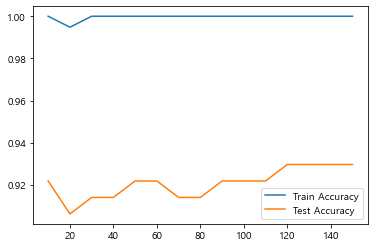

In [9]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle="-", label="Test Accuracy")
plt.legend()

> 생성하는 결정 트리 수 증가에 따라 Test 정확도는 증가하다가 120이후 유지됨  

> Train/test 데이터의 성능 변화를 고려하여 120 선택    

> OOB를 이용한 적정 나무 확인 가능

- n_estimators: 트리 수 변경에 따른 모델 oob error 변화

Text(0.5, 0, 'n_estimators')

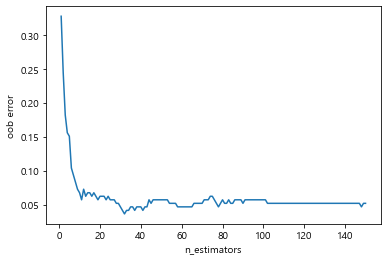

In [10]:
# error 저장 리스트
oob_error=[]

for v_n_estimator in range(1, 151):
    rf=RandomForestClassifier(n_estimators=v_n_estimator, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)
    
# 그래프로 표현
plt.plot(range(1, 151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

> 생성하는 결정 트리 수 증가에 따라 모델의 정확도는 증가하며(OOB Error는 감소)   

> 앞의 결과를 종합하여 60 선택

- max_depth: 최대 깊이 변경에 따른 모델 성능

In [11]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# min_samples_depth: 잎사귀 최소 자료 수
para_depth=[depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf=RandomForestClassifier(random_state=1234, max_depth=v_max_depth, n_estimators=60)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["Trainaccuracy"]=train_accuracy
df_accuracy_depth["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,Trainaccuracy,Testaccuracy
0,1,0.948,0.914
1,2,0.979,0.898
2,3,0.990,0.922
3,4,0.995,0.914
4,5,1.000,0.922
5,6,1.000,0.922
6,7,1.000,0.922
7,8,1.000,0.922
8,9,1.000,0.922
9,10,1.000,0.922


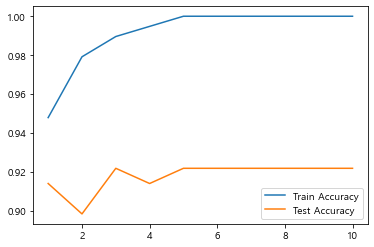

In [12]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="-", label="Test Accuracy")
plt.legend()

> 최대 깊이 증가에 따라 모델의 정확도는 일정 수준까지 증가하가 유지  
> Train/test 데이터의 성능 변화를 고려하여 5 선택

- min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [13]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# min_samples_split: 잎사귀 최소 자료 수
para_split=[n_split*10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf=RandomForestClassifier(random_state=1234, n_estimators=60, min_samples_split=v_min_samples_split, max_depth=5)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_split=pd.DataFrame()
df_accuracy_split["MinSamplesSplit"]=para_split
df_accuracy_split["Trainaccuracy"]=train_accuracy
df_accuracy_split["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,10,0.990,0.914
1,20,0.984,0.914
2,30,0.984,0.906
3,40,0.984,0.906
4,50,0.974,0.898
5,60,0.969,0.898
6,70,0.953,0.898
7,80,0.948,0.914
8,90,0.948,0.914
9,100,0.948,0.914


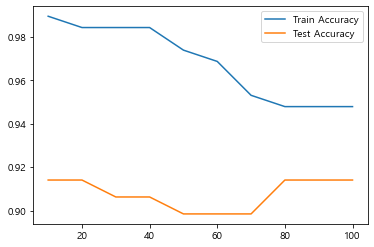

In [14]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle="-", label="Test Accuracy")
plt.legend()

> 분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하다가 유지  
> 모델의 성능을 위해 20 선택

- min_samples_leaf: 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [15]:
# train 및 test 설명력 결과 저장
train_accuracy=[]; test_accuracy=[]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf=[n_leaf*10 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestClassifier(random_state=1234, min_samples_split=20, min_samples_leaf=v_min_samples_leaf,n_estimators=60, max_depth=5)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_leaf=pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"]=para_leaf
df_accuracy_leaf["Trainaccuracy"]=train_accuracy
df_accuracy_leaf["Testaccuracy"]=test_accuracy

# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,10,0.969,0.906
1,20,0.958,0.914
2,30,0.948,0.898
3,40,0.943,0.914
4,50,0.958,0.914
5,60,0.943,0.906
6,70,0.599,0.758
7,80,0.599,0.758
8,90,0.599,0.758
9,100,0.599,0.758


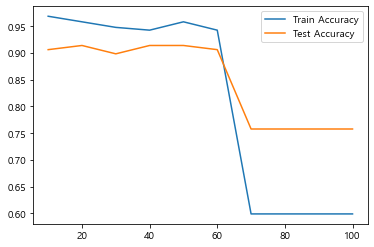

In [16]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="-", label="Test Accuracy")
plt.legend()

> 잎사귀 노듸의 최소 자료 수 증가에 따라 모델의 정확도는 감소하며  
> Train/test 데이터의 성능 변화를 고려하여 40 선택  

- GridSearchCV를 이용한 최적 parameter 찾기

In [17]:
estimator=RandomForestClassifier(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid={"max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=1, min_samples_leaf=30, min_samples_split=10,
                       random_state=1234)

best parameter: 
{'max_depth': 1, 'min_samples_leaf': 30, 'min_samples_split': 10}

best score: 
0.943


- 두 모델의 정분류율(정확도) 비교

In [18]:
## 직접 parameter를 구해본 모델의 정분류율
tree_1=RandomForestClassifier(random_state=1234, min_samples_split=20, min_samples_leaf=40, n_estimators=60, max_depth=5)
tree_1.fit(df_train_x, df_train_y)

# 평가
y_pred1=tree_1.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_1.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred1)))

Accuracy: 0.914

Confusion matrix: 
[[92  5]
 [ 6 25]]


In [19]:
# GridSearchCV를 이용해 구한 모델의 정분류율
tree_2=RandomForestClassifier(random_state=1234, min_samples_split=10, min_samples_leaf=30, n_estimators=60, max_depth=1)
tree_2.fit(df_train_x, df_train_y)

# 평가
y_pred1=tree_2.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_2.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred1)))

Accuracy: 0.914

Confusion matrix: 
[[92  5]
 [ 6 25]]


> 비교 결과 두 모델의 정분류율이 같으나,   
> GridSerachCV를 통해 구한 모델의 depth가 1이기 때문에   
> 직접 그래프를 보며 parameter를 구한 모델을 최종 모델로 선정

## 3. 최종 모델 선정 및 평가

### [목표변수 범주 예측 및 최종 모델 평가]

In [20]:
# 최종 모델
rf_final=RandomForestClassifier(random_state=1234, min_samples_split=20, min_samples_leaf=40, n_estimators=60, max_depth=5)
rf_final.fit(df_train_x, df_train_y)

# 평가
y_pred=rf_final.predict(df_test_x)
# 1: 양성, 0: 음성
print("목표변수 범주 예측값:\n", y_pred, "\n")

# 모델의 정확도와 confusion matrix
print("Accuracy: {0:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

목표변수 범주 예측값:
 [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1] 

Accuracy: 0.914

Confusion matrix: 
[[92  5]
 [ 6 25]]


> 최종 모델의 정분류율은 91.4%

## 4. 결론 도출

In [21]:
# 변수명 저장
v_feature_name=df_train_x.columns

# 결론 도출
# rf.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
6,mean_concavity,0.150
22,worst_perimeter,0.135
23,worst_area,0.117
7,mean_concave_points,0.103
27,worst_concave_points,0.101
20,worst_radius,0.083
3,mean_area,0.067
26,worst_concavity,0.050
0,mean_radius,0.050
2,mean_perimeter,0.050


Text(0, 0.5, '변수')

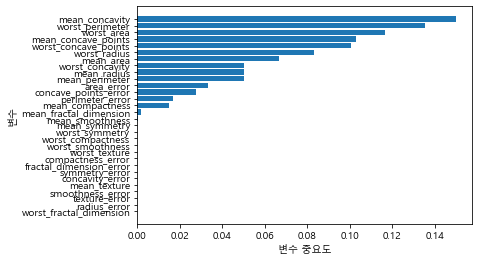

In [22]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

> 중요 설명변수:   
트리 생성 시 (세포)평균 오목함(mean_concavity), (세포)최대 둘레(worst_perimeter), (세포)평균 오목한 점의 수(mean_concave_points) 순으로 영향이 크다고 해석할 수 있음  

> 단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 훈련 데이터에 따라   
중요도는 변경될 수 있음